In [ ]:
# import numpy as np
# import argparse
# import cv2

In [ ]:
# ap = argparse.ArgumentParser()

In [ ]:
# ap.add_argument('-i', '--image', help='path to the image')

In [ ]:
# args = vars(ap.parse_args())

In [ ]:
# image = cv2.imread(args["image"])

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
img = cv2.imread('/Users/Rabbit/Downloads/spices_test.jpg')

plt.hist(img.ravel(), 256, [0,256])
plt.show()
plt.imshow(img)

In [ ]:
edges = cv2.Canny(img, 100, 200)

In [ ]:
plt.subplot(121), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
import numpy as np
import cv2

img = cv2.imread('/Users/Rabbit/Downloads/spices_test.jpg')
Z = img.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
res2

array([[[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 39,  60, 130],
        [ 39,  60, 130],
        [ 27,  28,  53]],

       [[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 39,  60, 130],
        [ 27,  28,  53],
        [ 27,  28,  53]],

       [[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 39,  60, 130],
        [ 27,  28,  53],
        [ 27,  28,  53]],

       ..., 
       [[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53]],

       [[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53]],

       [[ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,  53],
        ..., 
        [ 27,  28,  53],
        [ 27,  28,  53],
        [ 27,  28,

In [ ]:
color = ('b', 'g', 'r')
for idx, col in enumerate(color):
    histr = cv2.calcHist([img], [idx], None, [256, [0,256]])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.show()

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass



# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image('~/Downloads/china_test.jpg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [ ]:
# import the necessary packages
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2
 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "/Users/Rabbit/Downloads/china_test.jpg")
ap.add_argument("-c", "--clusters", required = True, type = int, help="8")
args = vars(ap.parse_args())

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2

In [ ]:
# load the image and grab its width and height
image = cv2.imread('/Users/Rabbit/Downloads/china_test.jpg')
#cv2.imshow('china', image)

In [ ]:
h = image.shape[0]
w = image.shape[1]
 
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

In [ ]:
 
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [ ]:
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 5)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

In [ ]:
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

In [ ]:
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
 

In [ ]:
quant.shape

In [ ]:
image.shape

In [ ]:
# display the images and wait for a keypress
cv2.imshow("image", np.hstack([image, quant]))
cv2.waitKey(0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

fig = plt.figure()
a=fig.add_subplot(1,2,1)
img = mpimg.imread('/Users/Rabbit/Downloads/china_test.jpg')
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation='horizontal')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

img = mpimg.imread('/Users/Rabbit/Downloads/china_test.jpg')
lum_img = img[:,:,0]
plt.hist(lum_img.flatten(), 256, range=(0.0, 1.0), fc='k', ec='k')


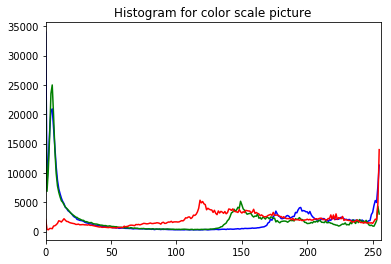

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/Users/Rabbit/Downloads/china_test.jpg', -1)
cv2.imshow('china',img)

color = ('b','g','r')
for channel, col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

while True:
    k = cv2.waitKey(0) & 0xFF     
    if k == 27: break             # ESC key to exit 
cv2.destroyAllWindows()

In [ ]:
from pylab import imread,imshow,figure,show,subplot
from numpy import reshape,uint8,flipud
from scipy.cluster.vq import kmeans,vq

In [ ]:
img = imread('/Users/Rabbit/Downloads/china_test.jpg')

# reshaping the pixels matrix
pixel = reshape(img,(img.shape[0]*img.shape[1],3))

# performing the clustering
centroids,_ = kmeans(pixel,6) # six colors will be found
# quantization
qnt,_ = vq(pixel,centroids)

# reshaping the result of the quantization
centers_idx = reshape(qnt,(img.shape[0],img.shape[1]))
clustered = centroids[centers_idx]

In [ ]:
figure(1)
subplot(211)
imshow(flipud(img))
subplot(212)
imshow(flipud(clustered))
show()

In [ ]:
# visualizing the centroids into the RGB space
from mpl_toolkits.mplot3d import Axes3D
fig = figure(2)
ax = fig.gca(projection='3d')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c=centroids/255.,s=100)

show()

In [ ]:
import PIL

In [ ]:
img = Image.open('/Users/Rabbit/Downloads/china_test.jpg')


In [ ]:
img_palette = PIL.ImagePalette.make_linear_lut(black=, white=)

In [ ]:
from PIL.ImagePalette import ImagePalette
img_palette = ImagePalette()

In [ ]:
type(img_palette)